In [1]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
# Directory with positive pictures
pos_dir = os.path.join('C:/Users/cgnsc/Data/concrete/Positive')

# Directory with negative pictures
neg_dir = os.path.join('C:/Users/cgnsc/Data/concrete/Negative')

In [5]:
train_pos_names = os.listdir(pos_dir)
print(train_pos_names[:5])

train_neg_names = os.listdir(neg_dir)
print(train_neg_names[:5])

['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg']
['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg']


In [6]:
print('total pos images:', len(os.listdir(pos_dir)))
print('total neg images:', len(os.listdir(neg_dir)))

total pos images: 20000
total neg images: 20000


Showing some neg pictures...



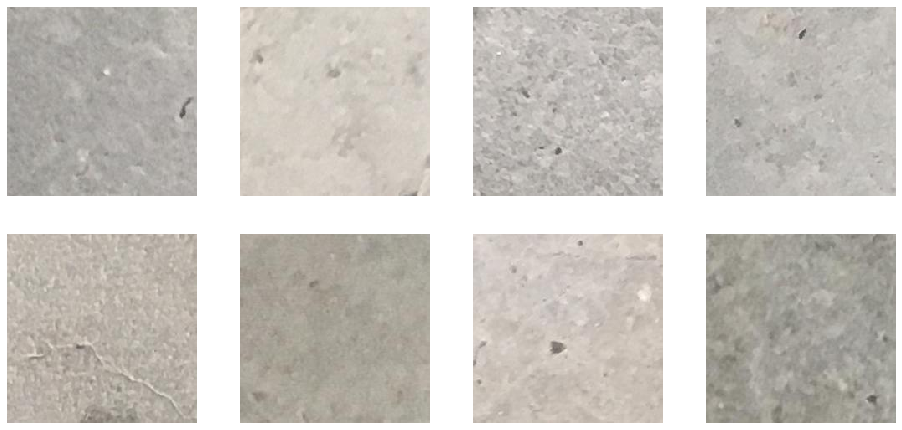

Showing some pos pictures...



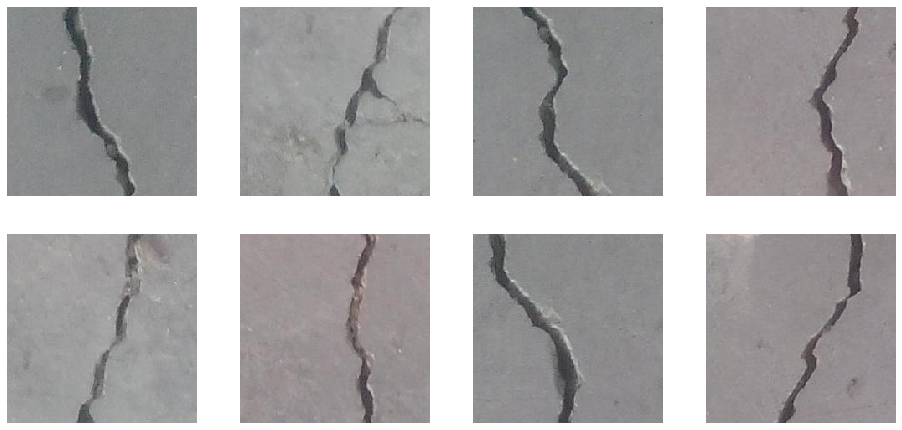

In [7]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_neg_pix = [os.path.join(neg_dir, fname) 
                for fname in train_neg_names[pic_index-8:pic_index]]
next_pos_pix = [os.path.join(pos_dir, fname) 
                for fname in train_pos_names[pic_index-8:pic_index]]

print ("Showing some neg pictures...")
print()
for i, img_path in enumerate(next_neg_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

print ("Showing some pos pictures...")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_pos_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
batch_size = 128

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'C:/Users/cgnsc/Data/concrete',  # This is the source directory for training images
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['Positive','Negative'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 40000 images belonging to 2 classes.


In [10]:
total_sample=train_generator.n

In [11]:
from keras.applications.vgg16 import VGG16
model = keras.models.Sequential ()
model.add(VGG16 (include_top=False, input_shape=(256,256,3)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3276900   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 17,991,790
Trainable params: 17,991,790
Non-trainable params: 0
_________________________________________________________________


In [14]:
#number of model runs
n_epochs = 1


In [15]:
history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        validation_split=0.25
        verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
312/312 [==============================] - 10131s 32s/step - loss: 8.0319


In [ ]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1])) 